# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 567


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=imperial&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | khandyga
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | funafuti
Processing Record 6 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | polyarnyy
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | greymouth
Processing Record 12 of Set 1 | yorkton
Processing Record 13 of Set 1 | penha
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | port augusta
Processing Record 16 of Set 1 | santa cruz
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | patong
Processing Record 19 of Set 1 | bel ombre
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | wait

Processing Record 41 of Set 4 | saint-laurent-du-maroni
Processing Record 42 of Set 4 | belton
Processing Record 43 of Set 4 | yangor
City not found. Skipping...
Processing Record 44 of Set 4 | lianzhou
Processing Record 45 of Set 4 | papao
Processing Record 46 of Set 4 | berdigestyakh
Processing Record 47 of Set 4 | oyon
Processing Record 48 of Set 4 | izluchinsk
Processing Record 49 of Set 4 | sarmiento
Processing Record 0 of Set 5 | alaghsas
Processing Record 1 of Set 5 | hammerfest
Processing Record 2 of Set 5 | anacapri
Processing Record 3 of Set 5 | guanica
Processing Record 4 of Set 5 | fiambala
Processing Record 5 of Set 5 | shangri-la
City not found. Skipping...
Processing Record 6 of Set 5 | achinsk
Processing Record 7 of Set 5 | indianola
Processing Record 8 of Set 5 | farafangana
Processing Record 9 of Set 5 | east end village
City not found. Skipping...
Processing Record 10 of Set 5 | port isabel
Processing Record 11 of Set 5 | hermanus
Processing Record 12 of Set 5 | lata

Processing Record 34 of Set 8 | jining
Processing Record 35 of Set 8 | thinadhoo
Processing Record 36 of Set 8 | sorada
Processing Record 37 of Set 8 | recani
Processing Record 38 of Set 8 | nemuro
Processing Record 39 of Set 8 | bhadra
Processing Record 40 of Set 8 | saipan
Processing Record 41 of Set 8 | lorengau
Processing Record 42 of Set 8 | kingston
Processing Record 43 of Set 8 | ribadesella
Processing Record 44 of Set 8 | tianpeng
Processing Record 45 of Set 8 | shimoda
Processing Record 46 of Set 8 | ocean city
Processing Record 47 of Set 8 | qarqin
Processing Record 48 of Set 8 | prado
Processing Record 49 of Set 8 | qamdo
Processing Record 0 of Set 9 | nellore
Processing Record 1 of Set 9 | vysokiy
Processing Record 2 of Set 9 | crane
Processing Record 3 of Set 9 | trairi
Processing Record 4 of Set 9 | dzhalagash
Processing Record 5 of Set 9 | tshabong
Processing Record 6 of Set 9 | pochinok
Processing Record 7 of Set 9 | fortuna
Processing Record 8 of Set 9 | guiratinga
Pro

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,73.15,86,95,18.28,PN,1699915953
1,khandyga,62.6667,135.6000,-27.72,100,67,2.86,RU,1699915953
2,puerto ayora,-0.7393,-90.3518,84.16,92,70,5.01,EC,1699915953
3,bilibino,68.0546,166.4372,-19.21,100,100,4.65,RU,1699915948
4,funafuti,-8.5243,179.1942,82.40,100,75,10.36,TV,1699915954


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,73.15,86,95,18.28,PN,1699915953
1,khandyga,62.6667,135.6000,-27.72,100,67,2.86,RU,1699915953
2,puerto ayora,-0.7393,-90.3518,84.16,92,70,5.01,EC,1699915953
3,bilibino,68.0546,166.4372,-19.21,100,100,4.65,RU,1699915948
4,funafuti,-8.5243,179.1942,82.40,100,75,10.36,TV,1699915954


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

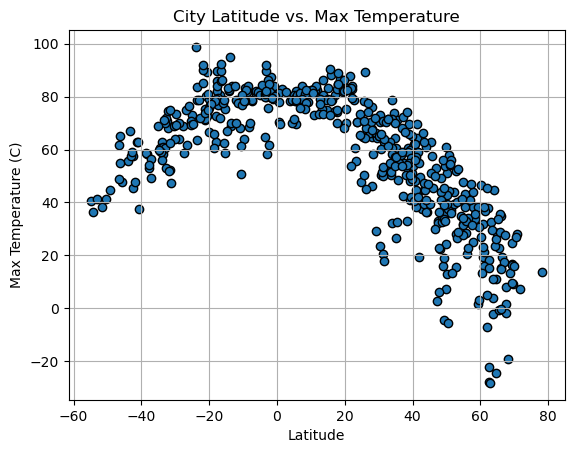

In [29]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
plt.scatter(latitude, max_temp, edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

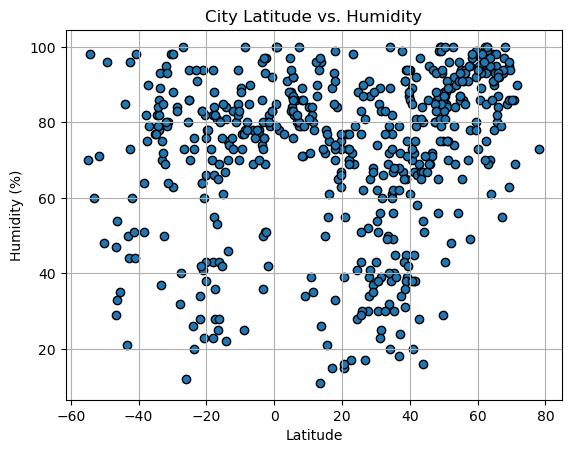

In [30]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

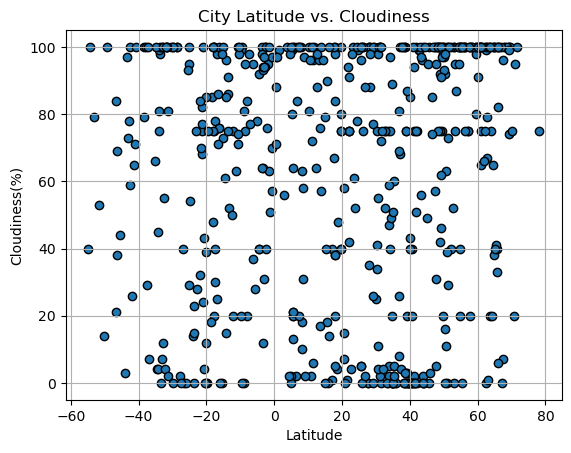

In [31]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

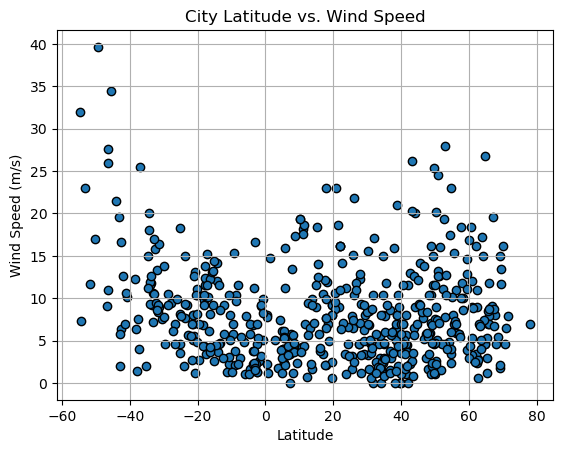

In [32]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, edgecolors="k")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def linregression_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_line = x_values*slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.annotate(line_eq,(0.5, 0.9), xycoords='axes fraction',color="r")
    plt.plot(x_values, regression_line, "-r")
    print(f"The R-Value is: {rvalue}")
    
    


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"])>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,khandyga,62.6667,135.6000,-27.72,100,67,2.86,RU,1699915953
3,bilibino,68.0546,166.4372,-19.21,100,100,4.65,RU,1699915948
6,polyarnyy,69.1989,33.4478,16.83,95,100,1.79,RU,1699915615
7,ilulissat,69.2167,-51.1000,24.82,63,100,14.97,GL,1699915597
9,yorkton,51.2167,-102.4677,37.24,70,100,12.66,CA,1699915679


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"])<=0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,73.15,86,95,18.28,PN,1699915953
2,puerto ayora,-0.7393,-90.3518,84.16,92,70,5.01,EC,1699915953
4,funafuti,-8.5243,179.1942,82.40,100,75,10.36,TV,1699915954
5,port-aux-francais,-49.3500,70.2167,44.83,96,100,39.66,TF,1699915439
8,greymouth,-42.4667,171.2000,57.49,96,100,16.69,NZ,1699915955


###  Temperature vs. Latitude Linear Regression Plot

The R-Value is: -0.8442477952825096


Text(0, 0.5, 'Max Temp')

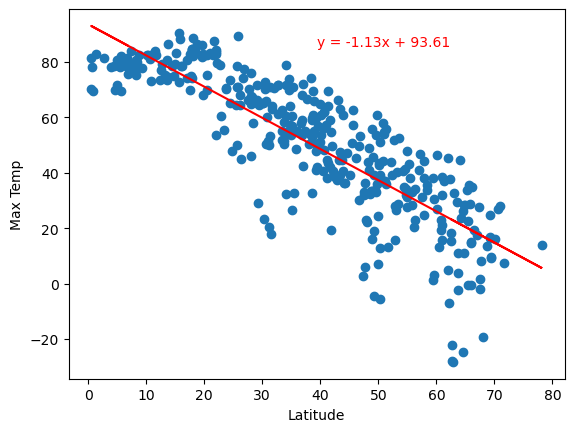

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
linregression_plot(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The R-Value is: 0.7295368933064736


Text(0, 0.5, 'Max Temp')

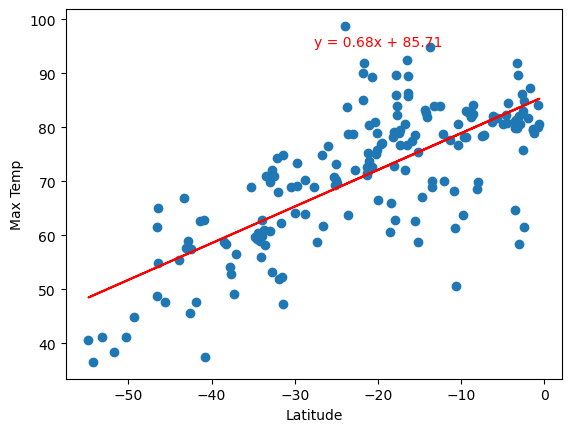

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
linregression_plot(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** These plots are showing the relationship between maximum temperature and latiude for the Northern and Southern hemisphere respectively. We can see in both plots as the latitude approaches 0 the maximum temperature increases. The Northern hemisphere has a negative correlation and the Southern has a positive correlation. Both seem to have a strong correlation based on the absolute value of the R-values.

### Humidity vs. Latitude Linear Regression Plot

The R-Value is: 0.23509741638727347


Text(0, 0.5, 'Humidity')

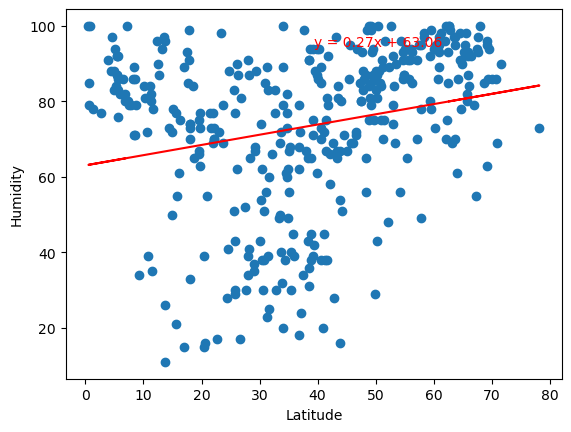

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
linregression_plot(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The R-Value is: 0.11800248351428821


Text(0, 0.5, 'Humidity')

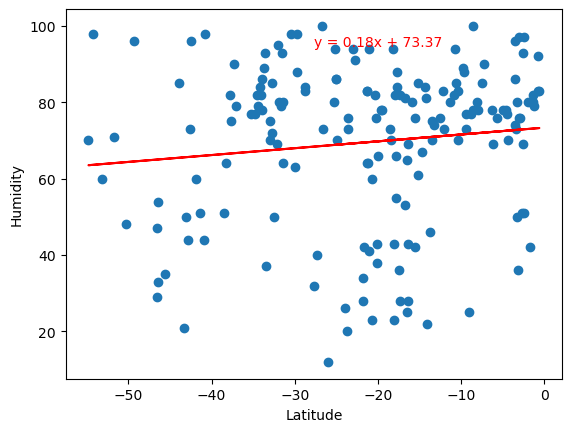

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
linregression_plot(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** These plots are showing the relationship between Latitude and Humidity for the Northern and Southern hemisphere respectively. We can see a slight positive correlation in both. Each plot has a low R-Value indicating a weak relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The R-Value is: 0.16255020081088928


Text(0, 0.5, 'Cloudiness')

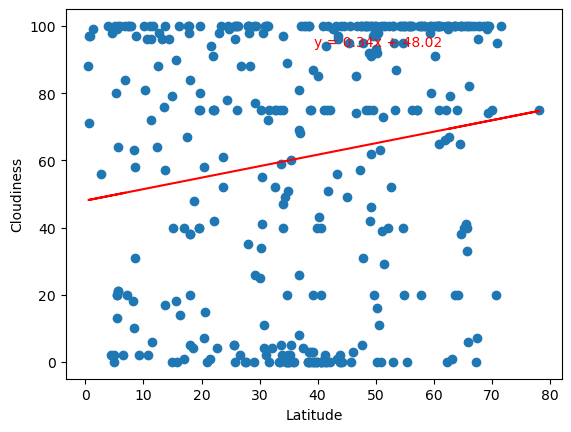

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
linregression_plot(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The R-Value is: 0.09824821723458657


Text(0, 0.5, 'Cloudiness')

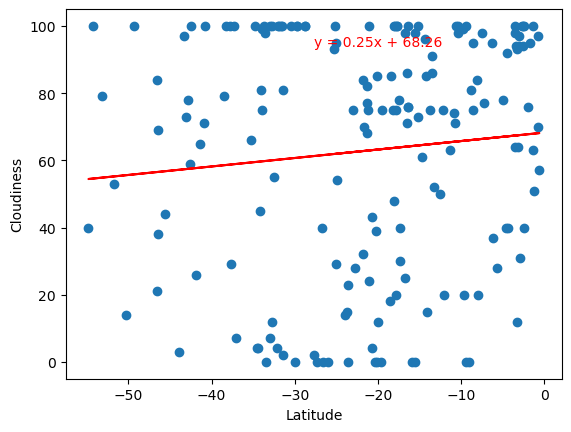

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
linregression_plot(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** These plots are showing the relationship between Latitude and Cloudiness for the Northern and Southern hemisphere respectively. We can see a slight positive correlation in both. Each plot has a low R-Value indicating a weak relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The R-Value is: 0.08404079326572574


Text(0, 0.5, 'Wind Speed')

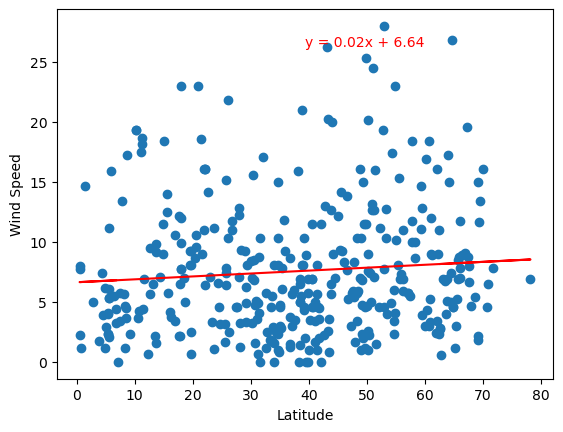

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
linregression_plot(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The R-Value is: -0.5371118749193666


Text(0, 0.5, 'Wind Speed')

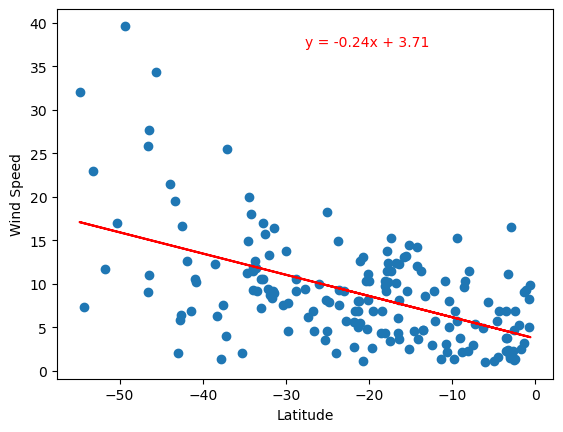

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
linregression_plot(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** These plots are showing the relationship between Latitude and Wind Speed for the Northern and Southern hemisphere respectively. We can see a slight positive correlation in the Northern hemisphere and a slightly stronger negative correlation in the Southern hemisphere. The Southern hemisphere has a higher absolute R-value indicating a stroonger relationship. 